# Ch05_Q08
## We will now perform cross-validation on a simulated data set.

## (a)  Generate a simulated data set as follows:
rng = np.random.default_rng(1)  
x = rng.normal(size=100)  
y = x - 2 * x**2 + rng.normal(size=100)
## In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [1]:
import numpy as np

# Set random seed for reproducibility
rng = np.random.default_rng(1)

# Generate x and y based on the given instructions
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n=100 (represents the number of observations in the dataset)  
p=1 (represents the number of predictors, x is the only predictor)

## (b) Create a scatterplot of X against Y . Comment on what you find.

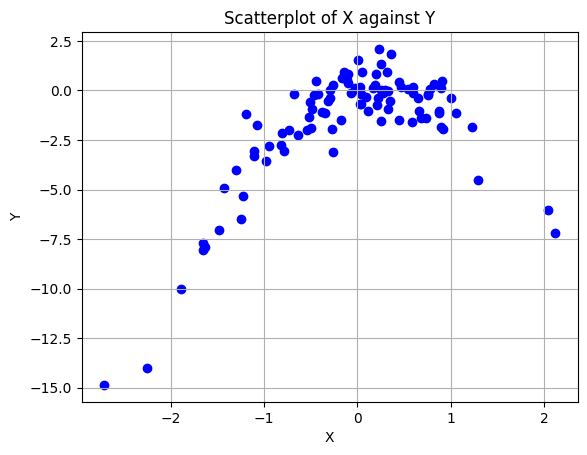

In [4]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(x, y, color = 'blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.grid(True)
plt.show()

## (c)  Set a random seed, and then compute the LOOCV errors thatresult from ftting the following four models using least squares:
i. Y = β0 + β1X + e  
ii. Y = β0 + β1X + β2X2 + e  
iii. Y = β0 + β1X + β2X2 + β3X3 + e  
iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + e  
##Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# Create a DataFrame for the data
data = pd.DataFrame({'X': x, 'Y': y})

# Define function to compute LOOCV error for a given polynomial degree
def compute_loocv_error(data, degree):
    X = np.vander(data['X'], degree + 1, increasing=True)  # Generate polynomial features
    y = data['Y'].values
    loo = LeaveOneOut()
    errors = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred) ** 2)  # Squared error for the test point

    loocv_error = np.mean(errors)  # Mean squared error across all LOOCV splits
    return loocv_error

# Compute LOOCV errors for each model
loocv_errors = {}
for degree in range(1, 5):  # Models with polynomial degrees from 1 to 4
    loocv_errors[f"Model with degree {degree}"] = compute_loocv_error(data, degree)

# Display the LOOCV errors
for model, error in loocv_errors.items():
    print(f"{model}: LOOCV Error = {error}")


Model with degree 1: LOOCV Error = 6.633029839181984
Model with degree 2: LOOCV Error = 1.122936856341969
Model with degree 3: LOOCV Error = 1.3017965489358863
Model with degree 4: LOOCV Error = 1.3323942694179336


## (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [11]:
rng = np.random.default_rng(42)  # Use a different seed here
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Create a new DataFrame with the new data
data_new = pd.DataFrame({'X': x, 'Y': y})

# Compute LOOCV errors for each model using the new data
loocv_errors_new = {}
for degree in range(1, 5):  # Models with polynomial degrees from 1 to 4
    loocv_errors_new[f"Model with degree {degree}"] = compute_loocv_error(data_new, degree)

# Display the new LOOCV errors
for model, error in loocv_errors_new.items():
    print(f"{model}: LOOCV Error = {error}")


Model with degree 1: LOOCV Error = 4.2518828656027745
Model with degree 2: LOOCV Error = 0.9639984632709344
Model with degree 3: LOOCV Error = 0.9912711879229305
Model with degree 4: LOOCV Error = 1.018180104380912


no, because it used a different random seed. This seed changes the specific values in X and the random noise ϵ in Y, resulting in a different data set.

## (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

Model with degree 2 has the smallest LOOCV error. Since the data was generated by a quadratic equation, it is expected that the degree 2 model would provide the best fit with the lowest LOOCV error.

## (f) Comment on the statistical significance of the coefcient estimates that results from ftting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [12]:
import statsmodels.api as sm

# Fit each model and print the summary
data['X2'] = data['X'] ** 2
data['X3'] = data['X'] ** 3
data['X4'] = data['X'] ** 4

# Model 1: Y = β0 + β1X + e
model_1 = sm.OLS(data['Y'], sm.add_constant(data[['X']])).fit()
print("Model 1 Summary:\n", model_1.summary())

# Model 2: Y = β0 + β1X + β2X^2 + e
model_2 = sm.OLS(data['Y'], sm.add_constant(data[['X', 'X2']])).fit()
print("\nModel 2 Summary:\n", model_2.summary())

# Model 3: Y = β0 + β1X + β2X^2 + β3X^3 + e
model_3 = sm.OLS(data['Y'], sm.add_constant(data[['X', 'X2', 'X3']])).fit()
print("\nModel 3 Summary:\n", model_3.summary())

# Model 4: Y = β0 + β1X + β2X^2 + β3X^3 + β4X^4 + e
model_4 = sm.OLS(data['Y'], sm.add_constant(data[['X', 'X2', 'X3', 'X4']])).fit()
print("\nModel 4 Summary:\n", model_4.summary())


Model 1 Summary:
                             OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.04e-09
Time:                        07:30:29   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247  

Model with degree 1 and 2 are statistical significance.